# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading datasets

In [21]:
df=pd.read_csv('/content/NSE-TATAGLOBAL.csv')
df_test=pd.read_csv('/content/tatatest.csv')

#EDA

In [3]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2035.0,1.497137e+02,4.866451e+01,81.10,120.025,141.50,157.175,327.70
High,2035.0,1.519928e+02,4.941311e+01,82.80,122.100,143.40,159.400,328.75
Low,2035.0,1.472939e+02,4.793196e+01,80.00,118.300,139.60,155.150,321.65
Last,2035.0,1.494743e+02,4.873257e+01,81.00,120.075,141.10,156.925,325.95
Close,2035.0,1.494503e+02,4.871204e+01,80.95,120.050,141.25,156.900,325.75
Total Trade Quantity,2035.0,2.335681e+06,2.091778e+06,39610.00,1146444.500,1783456.00,2813594.000,29191015.00
Turnover (Lacs),2035.0,3.899981e+03,4.570768e+03,37.04,1427.460,2512.03,4539.015,55755.08


In [5]:
df.nunique()

,0
Date,2035
Open,1165
High,1257
Low,1263
Last,1268
Close,1313
Total Trade Quantity,2034
Turnover (Lacs),2030


In [6]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Last,float64
Close,float64
Total Trade Quantity,int64
Turnover (Lacs),float64


#

In [7]:
training_set=df.iloc[:,1:2].values

In [8]:
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

# Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [10]:
# Creating a data structure with 60 timestamps and 1 output
x_train=[]
y_train=[]
for i in range(60,2035):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [11]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [12]:
x_train.shape

(1975, 60, 1)

# Deep Learning (Keras)

In [13]:
# importing keras libraries and models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [14]:
# Initializing the RNN
regressor=Sequential()
# Adding the first LSTM layer and some dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# adding 2nd LSTM layer and dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True,))
regressor.add(Dropout(0.2))

In [16]:
# adding 3rd LSTM layer and dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [17]:
# adding 4th LSTM layer and dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [18]:
# Adding the output layer
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mse')

In [20]:
# Fitting the RNN to the training set
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0243
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0035
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0031
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0025
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0021
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0024
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0021
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0020
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0022
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0022
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0019
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018
Epoch 13/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0019
Epoch 14/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0016
Epoch 15/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - lo

# Testing

In [23]:
df_test

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,24-10-2018,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,23-10-2018,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,22-10-2018,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,19-10-2018,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,17-10-2018,237.70,240.80,229.45,231.30,231.10,2945914,6961.65
5,16-10-2018,237.10,237.70,233.05,234.40,235.45,1723113,4052.25
6,15-10-2018,229.70,237.00,226.80,234.80,234.90,1224339,2845.68
7,12-10-2018,226.25,232.35,225.50,228.70,229.10,1165527,2675.91
8,11-10-2018,215.00,229.70,215.00,225.60,224.60,1293881,2890.85
9,10-10-2018,215.00,229.65,215.00,228.25,228.40,2919278,6557.95


In [27]:
real_stock_price= df_test.iloc[:,1:2].values

In [28]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [29]:
#getting the predicted stock prize of 2017
dataset_total=pd.concat((df['Open'],df_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(df_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,76):
  x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


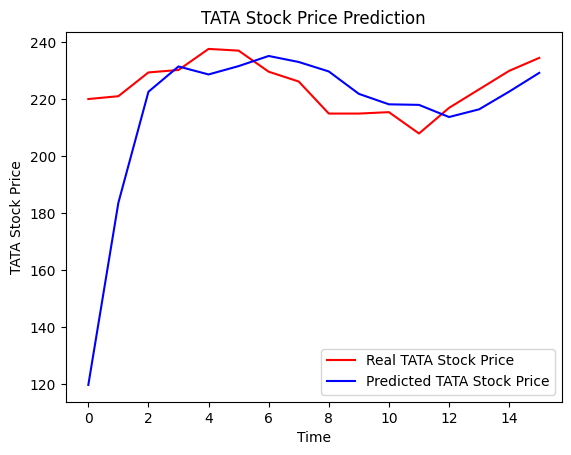

In [31]:
# visualising the result
plt.plot(real_stock_price,color='red',label='Real TATA Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()